# Imports

In [1]:
import numpy as np
import tensorflow as tf

from neuroxai.utils.process import get_last_layer, get_last_conv_layer

from examples.classification_model import get_classification_model, get_xai_classification_model, load_images_2d, ResNet50V2
from examples.segmentation_model import get_deepseg, load_images, get_xai_segmentation_model
from neuroxai.utils.explain import get_neuroxai, get_neuroxai_cnn

1 Physical GPUs, 1 Logical GPUs



/home/dl_machine/anaconda3/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


# Explainable AI

## NeuroXAI Experiment 1: Classification comparative study (All XAI methods)

### Explaination of a one sample

In [2]:
# NeuroXAI parameters
DIMENSION = "2d"
MODALITY = "FLAIR"
XAI_MODE = "classification"
CLASS_IDs = [0,1]
TUMOR_LABEL = "all"
layer_n = None # get the last layer

# Classification model parameters
IM_SIZE=224
NETWORK=ResNet50V2 # ResNet50V2, VGG16
MODEL_WEIGHTS = "./weights/ResNet50_model.hdf5"
DATASET_PATH = "/mnt/SSD/Datasets/BRATS_2019_2d/"

# Sample MRI case
TRUTH_GRADE="HGG" #"LGG"
ID="BraTS19_CBICA_BAX_1_51"
tumor_2_label = {"HGG": 0, "LGG": 1}
class_id = tumor_2_label[TRUTH_GRADE]
io_imgs = load_images_2d("{}/FLAIR/{}/{}.png".format(DATASET_PATH, TRUTH_GRADE, ID))

# get the classification model
c_model = get_classification_model(IM_SIZE=IM_SIZE, MODEL_WEIGHTS=MODEL_WEIGHTS, NETWORK=NETWORK)
model = get_xai_classification_model(c_model, layer_n)

# Predict the class
_, predictions = model(io_imgs)
prediction_class = np.argmax(predictions[0])

# Debugging
print("Truth class:", TRUTH_GRADE) # 0: HGG, 1: LGG
print("Predicted class:", prediction_class) # 0: HGG, 1: LGG
print("Confidence HGG:", float(predictions[0][0]), ", Confidence LGG: {:.2f}".format(float(predictions[0][1]))) # 0: HGG, 1: LGG

Truth class: HGG
Predicted class: 0
Confidence HGG: 1.0 , Confidence LGG: 0.00


Visual exaplanations for...
	 ID: BraTS19_CBICA_BAX_1_51, layer: dense_1


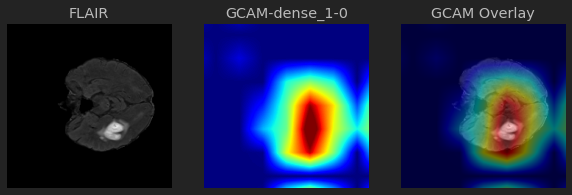

In [3]:
get_neuroxai_cnn(ID, model, io_imgs, CLASS_ID=class_id, LAYER_NAME=layer_n, XAI_MODE="classification", 
                 XAI="GCAM", DIMENSION="2d", CLASS_IDs=CLASS_IDs, TUMOR_LABEL=TUMOR_LABEL, SAVE_RESULTS=False, SAVE_PATH="Class_Results")

Visual exaplanations for...
	 ID: BraTS19_CBICA_BAX_1_51, layer: dense_1


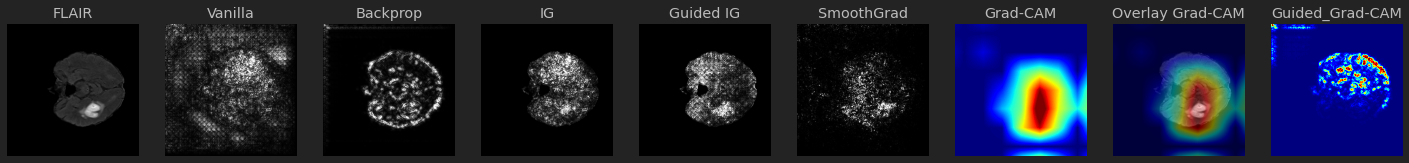

In [4]:
get_neuroxai(ID, model, io_imgs, CLASS_ID=class_id, LAYER_NAME=layer_n, XAI_MODE="classification",
             DIMENSION="2d", CLASS_IDs=CLASS_IDs, TUMOR_LABEL=TUMOR_LABEL, SAVE_RESULTS=False, SAVE_PATH="Class_Results")

### Exp 1

In [ ]:
NETWORK=ResNet50V2 # ResNet50V2, VGG16
PROJECT_NAME="ResNet50_model"
MODEL_WEIGHTS = "weights/"+PROJECT_NAME+".hdf5"
#MODEL_WEIGHTS = "weights/resnet_model-300.hdf5"

GRADE="HGG" #"LGG"
tumor_2_label = {"HGG": 0, "LGG": 1}
label_2_tumor = {0:"HGG", 1:"LGG"}
HGG_IDs = ["BraTS19_2013_3_1_84", "BraTS19_2013_2_1_87",
           "BraTS19_TCIA03_199_1_79", "BraTS19_CBICA_BAX_1_51", "BraTS19_CBICA_AOD_1_67", 
           "BraTS19_CBICA_AOO_1_83", "BraTS19_CBICA_AOZ_1_73",
           "BraTS19_TCIA01_499_1_47",  "BraTS19_TCIA02_117_1_47", "BraTS19_TCIA02_394_1_43", "BraTS19_TCIA02_394_1_47"] # small parts
LGG_IDs = ["BraTS19_2013_0_1_73", "BraTS19_2013_1_1_53", "BraTS19_2013_6_1_103", "BraTS19_2013_16_1_91",
          "BraTS19_2013_24_1_81", "BraTS19_2013_28_1_73", "BraTS19_2013_29_1_99", "BraTS19_TCIA09_141_1_111",
          "BraTS19_TCIA09_254_1_43", "BraTS19_TCIA09_255_1_81", "BraTS19_TCIA09_402_1_77", "BraTS19_TCIA10_109_1_93",
          "BraTS19_TCIA10_152_1_47", "BraTS19_TCIA10_351_1_81"]
# Done 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16
# ID=LGG_IDs[10]
ID="BraTS19_TCIA02_394_1_47"
DIMENSION="2d"
CLASS_IDs = [0,1]

m = get_classification_model(MODEL_WEIGHTS=MODEL_WEIGHTS, NETWORK=NETWORK)
#layer_n = get_last_layer(m).name
#layer_n = get_last_conv_layer(m).name
#layer_n = "conv5_block3_3_conv"
layer_n = None

if layer_n == None:
    xai_layer = get_last_conv_layer(m)
else:
    xai_layer = m.get_layer(layer_n)

model = tf.keras.models.Model([m.inputs], [xai_layer.output, m.output])
class_id = tumor_2_label[GRADE] #np.argmax(predictions[0])


#im_orig = cv2.imread(DATASET_PATH+"FLAIR/LGG/BraTS19_2013_1_1_58.png")
#im_orig = cv2.imread("{}/FLAIR/{}/{}.png".format(DATASET_PATH, GRADE, ID))
io_imgs = load_images_2d("{}/FLAIR/{}/{}.png".format(DATASET_PATH, GRADE, ID))
# show_image(im_orig)
# Predict the class
_, predictions = model(io_imgs)
prediction_class = np.argmax(predictions[0])
print("Predicted class:", prediction_class) # 0: HGG, 1: LGG
print("Confidence HGG:", float(predictions[0][0]), ", Confidence LGG:", float(predictions[0][1])) # 0: HGG, 1: LGG

In [ ]:
get_neuroxai(ID, model, io_imgs, CLASS_ID=class_id, LAYER_NAME=layer_n, XAI_MODE="classification", 
                     DIMENSION="2d", SAVE_RESULTS=False, SAVE_PATH="Class_Results")

In [ ]:
# LGG
GRADE="LGG"
class_id = tumor_2_label[GRADE] #np.argmax(predictions[0])
for i, ID in enumerate(LGG_IDs):
    print("Visualizing: ({}/{})".format(i+1, len(LGG_IDs)))
    #if i>0: break
    #ID=LGG_IDs[i]
    #im_orig = cv2.imread(DATASET_PATH+"FLAIR/LGG/BraTS19_2013_1_1_58.png")
    im_orig = cv2.imread("{}/FLAIR/{}/{}.png".format(DATASET_PATH, GRADE, ID))
    io_imgs = load_images_2d(im_orig)

    get_neuroxai(ID, model, io_imgs, class_id, XAI_MODE="classification", 
                     DIMENSION="2d", SAVE_RESULTS=True, SAVE_PATH="NeuroXAI_Exp1_Class_LGG")

In [ ]:
# HGG
GRADE="HGG"
class_id = tumor_2_label[GRADE] #np.argmax(predictions[0])
for i, ID in enumerate(HGG_IDs):
    print("Visualizing: ({}/{})".format(i+1, len(LGG_IDs)))
    #if i>0: break
    #ID=LGG_IDs[i]
    #im_orig = cv2.imread(DATASET_PATH+"FLAIR/LGG/BraTS19_2013_1_1_58.png")
    im_orig = cv2.imread("{}/FLAIR/{}/{}.png".format(DATASET_PATH, GRADE, ID))
    io_imgs = load_images_2d(im_orig)
    
    get_neuroxai(ID, model, io_imgs, class_id, XAI_MODE="classification", 
                     DIMENSION="2d", SAVE_RESULTS=True, SAVE_PATH="NeuroXAI_Exp1_Class_HGG")

## NeuroXAI Experiment 2: Segmentation comparative study (All XAI methods)

### Explaination of a one sample

In [13]:
# NeuroXAI parameters
DIMENSION = "3d"
MODALITY = "FLAIR"
XAI_MODE = "segmentation"
CLASS_IDs = [1,2,3]
TUMOR_LABEL = "all" # for GCAM visualization
LAYER_NAME = None #'output_layer'
#LAYER_NAME = 'conv3d_22' #conv3d_10

# Segmentation model parameters
DATASET_PATH = '/mnt/SSD/Datasets/BRATS_2021/BraTS2021_TrainingData/' # RT
IMG_SHAPE = (192, 224, 160)

# get the segmentation model
s_model = get_deepseg(WEIGHTS="weights/DeepSeg_model.hdf5")
model = get_xai_segmentation_model(s_model, LAYER_NAME)

# Sample MRI case
ID = "BraTS2021_01092"
SLICE_ID = 77
CLASS_ID = 2 #np.argmax(predictions[0])
TUMOR_LABEL="all" # for grad-CAM
io_imgs = load_images(model, ID, PATH_DATA=DATASET_PATH, DIM=IMG_SHAPE)
im_orig = io_imgs[:,:,:,SLICE_ID,0] # 2D FLAIR

Visual exaplanations for...
	 ID: BraTS2021_01092, layer: output_layer_soft


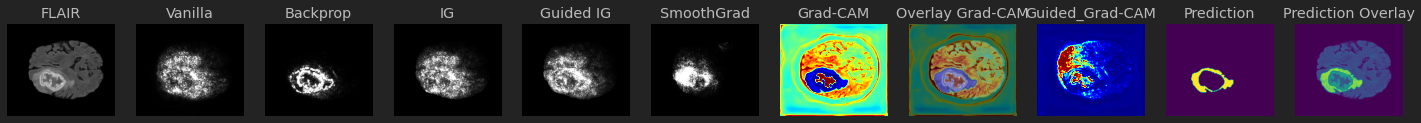

In [10]:
get_neuroxai(ID, model, io_imgs, CLASS_ID=2, SLICE_ID=77, LAYER_NAME=None, MODALITY="FLAIR", XAI_MODE="segmentation", 
                     DIMENSION="3d", SAVE_RESULTS=False, SAVE_PATH="NeuroXAI_Sample_Seg_All")



Visual exaplanations for...
	 ID: BraTS2021_01092, layer: output_layer_soft


NameError: name 'os' is not defined

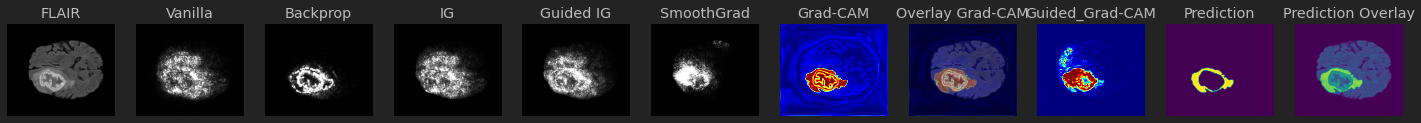

In [14]:
get_neuroxai(ID, model, io_imgs, CLASS_ID, SLICE_ID, LAYER_NAME, MODALITY, XAI_MODE, 
                     DIMENSION, CLASS_IDs, TUMOR_LABEL, SAVE_RESULTS=True, SAVE_PATH="NeuroXAI_Sample_Seg_All")

### XAI for the last layer (last conv for GCAM)

In [ ]:
# save nifti for all layers
XAI_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
modality="FLAIR"
save_path="NeuroXAI_Exp2_Seg_All/"
TUMOR_LABEL="all1" # for grad-CAM
label=2

for n, case_id in enumerate(XAI_IDs):
    #if n>0: break
    print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
    for label in tumor_labels:
        #if label != "l0": break
        print("\tLabel:", label)
        get_neuroxai(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=None, MODALITY=modality, XAI_MODE="segmentation", 
                     DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)


In [ ]:
# save nifti for all layers
XAI_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
modality="FLAIR"
save_path="NeuroXAI_Exp2_Seg_All/"
TUMOR_LABEL="all" # for grad-CAM
label=2

for n, case_id in enumerate(XAI_IDs):
    #if n>0: break
    print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
    get_neuroxai(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=None, MODALITY=modality, 
                       XAI_MODE="segmentation", DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)

### XAI for the last conv layer

In [ ]:
# save nifti for all layers
Good_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
Good_SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
tumor_labels = {0,1,2,3}
modality="FLAIR"
save_path="NeuroXAI_Exp2_Seg/"
XAI_IDs = Good_IDs
SLICE_IDs = Good_SLICE_IDs
layer_n='output_layer'
TUMOR_LABEL="all1" # for grad-CAM

for n, case_id in enumerate(XAI_IDs):
    #if n>0: break
    print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
    for label in tumor_labels:
        #if label != "l0": break
        print("\tLabel:", label)
        get_neuroxai(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=layer_n, MODALITY=modality, XAI_MODE="segmentation", 
                     DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)


In [ ]:
# save nifti for all layers
Good_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
Good_SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
tumor_labels = {1,2,3}
m_id = 0
modality="FLAIR"
save_path="NeuroXAI_Exp2_Seg_All/"
XAI_IDs = Good_IDs
SLICE_IDs = Good_SLICE_IDs
layer_n='output_layer'
TUMOR_LABEL="all" # for grad-CAM
label=2
for n, case_id in enumerate(XAI_IDs):
    #if n>0: break
    print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
    get_neuroxai(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=layer_n, MODALITY=modality, 
                       XAI_MODE="segmentation", DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)
    
# XAI for the last conv layer

## NeuroXAI Experiment 3: Segmentation CNN

### Explaination of a one sample

In [2]:
# NeuroXAI parameters
DIMENSION = "3d"
MODALITY = "FLAIR"
XAI_MODE = "segmentation"
CLASS_IDs = [1,2,3]
TUMOR_LABEL = "all" # for GCAM visualization
LAYER_NAME = None #'output_layer'
#LAYER_NAME = 'conv3d_18' #conv3d_10
XAI="GCAM"

# Segmentation model parameters
DATASET_PATH = '/mnt/SSD/Datasets/BRATS_2021/BraTS2021_TrainingData/' # RT
IMG_SHAPE = (192, 224, 160)

# get the segmentation model
s_model = get_deepseg(WEIGHTS="weights/DeepSeg_model.hdf5")
model = get_xai_segmentation_model(s_model, LAYER_NAME)

# Sample MRI case
ID = "BraTS2021_01092"
SLICE_ID = 77
CLASS_ID = 2 #np.argmax(predictions[0])
TUMOR_LABEL="all" # for grad-CAM
io_imgs = load_images(model, ID, PATH_DATA=DATASET_PATH, DIM=IMG_SHAPE)
im_orig = io_imgs[:,:,:,SLICE_ID,0] # 2D FLAIR

Visual exaplanations for...
	 ID: BraTS2021_01092, layer: output_layer_soft


TypeError: expected str, bytes or os.PathLike object, not NoneType

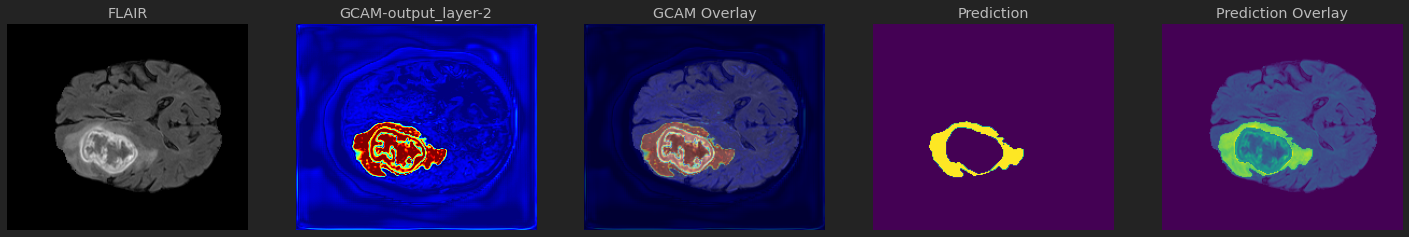

In [3]:
get_neuroxai_cnn(ID, model, io_imgs, CLASS_ID, SLICE_ID, LAYER_NAME, MODALITY, 
                 XAI_MODE, XAI, DIMENSION, CLASS_IDs, TUMOR_LABEL, 
                 SAVE_RESULTS=True, SAVE_PATH="NeuroXAI_Sample_Seg_GCAM")

### Exp 3

In [ ]:
# debugging
m = deepseg_model
#layer_n = 'conv3d_15'
layer_n = 'output_layer' # output_layer_soft
#layer_n = 'activation_25' #conv3d_10
tumor_l = "all"
conv_layer = m.get_layer(layer_n)
# conv_layer = m.get_layer('conv3d_1065')

model = tf.keras.models.Model([m.inputs], [conv_layer.output, m.output])

# ID = "BraTS2021_00523" # case ID
# ID = "BraTS2021_00377" # case ID
ID = config["brats_input_path"] # BraTS2021_01092
SLICE_ID = 77
CLASS_INDEX = 2 #np.argmax(predictions[0])
TUMOR_LABEL="all" # for grad-CAM

imgs_preprocess, pred_data_3ch, pred_data_m, pred_data_m_post = load_images(model, ID=config["brats_input_path"], 
                                                                            post_enhancing=config["post_enhancing"])

io_imgs = imgs_preprocess[np.newaxis, ...]
im_orig = imgs_preprocess[:,:,SLICE_ID,0] # 2D FLAIR

In [ ]:
# save nifti for all layers
Good_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
Good_SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
tumor_labels = {0,1,2,3}
m_id = 0
modality="FLAIR"
save_path="NeuroXAI_Exp3_CNN_GCAM/"
XAI_IDs = Good_IDs
SLICE_IDs = Good_SLICE_IDs
TUMOR_LABEL="all1" # for grad-CAM
        
for n, case_id in enumerate(XAI_IDs):
    #if n>0: break
    print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
    for label in tumor_labels:
        #if label != "l0": break
        print("\tLabel:", label)
        for i in range(26):
            #if i!=25: continue
            print("\t\tLayer:", i+1)
            if i == 0:
                layer_name = 'conv3d'
            elif i == 25:
                layer_name = 'output_layer'
            else:
                layer_name = 'conv3d_{}'.format(i)
            
            conv_layer = m.get_layer(layer_name)
            model = tf.keras.models.Model([m.inputs], [conv_layer.output, m.output])
            
            get_neuroxai_cnn(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=layer_name, MODALITY=modality, 
                               XAI_MODE="segmentation", XAI="GCAM", DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)

In [ ]:
# save nifti for all layers
Good_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
Good_SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
m_id = 0
modality="FLAIR"
save_path="NeuroXAI_Exp3_CNN_GCAM_All/"
XAI_IDs = Good_IDs
SLICE_IDs = Good_SLICE_IDs
TUMOR_LABEL="all" # for grad-CAM
        
for n, case_id in enumerate(XAI_IDs):
        #if n>0: break
        print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
        label=2
        for i in range(26):
            #if i!=25: continue
            print("\t\tLayer:", i+1)
            if i == 0:
                layer_name = 'conv3d'
            elif i == 25:
                layer_name = 'output_layer'
            else:
                layer_name = 'conv3d_{}'.format(i)
            
            conv_layer = m.get_layer(layer_name)
            model = tf.keras.models.Model([m.inputs], [conv_layer.output, m.output])
            
            get_neuroxai_cnn(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=layer_name, MODALITY=modality, 
                               XAI_MODE="segmentation", XAI="GCAM", DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)

In [ ]:
# save nifti for all layers
Good_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
Good_SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
tumor_labels = {0,1,2,3}
m_id = 0
modality="FLAIR"
save_path="NeuroXAI_Exp3_CNN_GGCAM/"
XAI_IDs = Good_IDs
SLICE_IDs = Good_SLICE_IDs
TUMOR_LABEL="all1" # for grad-CAM
        
for n, case_id in enumerate(XAI_IDs):
    #if n>0: break
    print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
    for label in tumor_labels:
        #if label != "l0": break
        print("\tLabel:", label)
        for i in range(26):
            #if i!=25: continue
            print("\t\tLayer:", i+1)
            if i == 0:
                layer_name = 'conv3d'
            elif i == 25:
                layer_name = 'output_layer'
            else:
                layer_name = 'conv3d_{}'.format(i)
            
            conv_layer = m.get_layer(layer_name)
            model = tf.keras.models.Model([m.inputs], [conv_layer.output, m.output])
            
            get_neuroxai_cnn(case_id, model, 6, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=layer_name, MODALITY=modality, 
                               XAI_MODE="segmentation", XAI="GGCAM", DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)

In [ ]:
# save nifti for all layers
Good_IDs = ["BraTS2021_01652", "BraTS2021_00542", "BraTS2021_01381"]
Good_SLICE_IDs = [111, 65, 95]

modalities = {"FLAIR","T1","T1CE","T2"}
tumor_labels = {1,2,3}
m_id = 0
modality="FLAIR"
save_path="NeuroXAI_Exp3_CNN_GGCAM_All/"
XAI_IDs = Good_IDs
SLICE_IDs = Good_SLICE_IDs
TUMOR_LABEL="all" # for grad-CAM
        
for n, case_id in enumerate(XAI_IDs):
        #if n>0: break
        print("Explainaing case: {} ({}/{})".format(case_id, n+1, len(XAI_IDs)))
        label=2
        for i in range(26):
            #if i!=25: continue
            print("\t\tLayer:", i+1)
            if i == 0:
                layer_name = 'conv3d'
            elif i == 25:
                layer_name = 'output_layer'
            else:
                layer_name = 'conv3d_{}'.format(i)
            
            conv_layer = m.get_layer(layer_name)
            model = tf.keras.models.Model([m.inputs], [conv_layer.output, m.output])
            
            get_neuroxai_cnn(case_id, model, io_imgs, CLASS_ID=label, SLICE_ID=SLICE_IDs[n], LAYER_NAME=layer_name, MODALITY=modality, 
                               XAI_MODE="segmentation", XAI="GGCAM", DIMENSION="3d", SAVE_RESULTS=True, SAVE_PATH=save_path)

In [ ]:
model.summary()